In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('height weight.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.shape

(8555, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

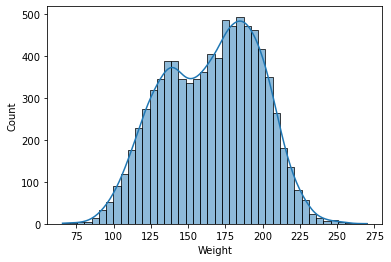

In [6]:
sns.histplot(df['Weight'],kde=True)

In [7]:
mean_value = df['Weight'].mean()

In [8]:
mean_value

165.63273532667586

In [9]:
std_value = df['Weight'].std()
std_value

32.04392221721549

In [10]:
std_3 =mean_value + (2.5 * std_value)
std_3

245.74254086971456

In [11]:
neg_std_3 =mean_value - (2.5 * std_value)
neg_std_3

85.52292978363714

In [12]:
df[df['Weight']>std_3]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741
3285,Male,78.528210,253.889004


In [13]:
df[df['Weight']<neg_std_3]

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
5026,Female,56.547975,84.872124
5214,Female,56.785434,83.993077
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7324,Female,56.810317,84.170695


In [14]:
merge = df[(df['Weight']>std_3) | (df['Weight']<neg_std_3)]

In [15]:
merge.shape

(27, 3)

In [16]:
remove_out_columns = df[(df['Weight']<std_3) | (df['Weight']>neg_std_3)]

In [17]:
remove_out_columns.shape

(8555, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

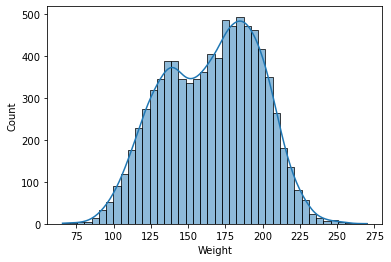

In [18]:
sns.histplot(remove_out_columns['Weight'],kde=True)

# One Hot Encoding

In [19]:
dummy_variable = pd.get_dummies(remove_out_columns['Gender'],drop_first=True)

In [20]:
dummy_variable.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [21]:
new_df = remove_out_columns.drop('Gender',axis=1)

In [22]:
new_df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [23]:
x = df.drop('Height',axis=1)

In [24]:
x.head()

,Gender,Weight
0,Male,241.893563
1,Male,162.310473
2,Male,212.740856
3,Male,220.042470
4,Male,206.349801


In [25]:
y = df['Height']

In [26]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

# Linear Regression 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [29]:
xtrain.shape

(5988, 2)

In [30]:
xtest.shape

(2567, 2)

In [31]:
ytrain.shape

(5988,)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lre = LinearRegression()

In [34]:
lre.fit(xtrain,ytrain)

ValueError: could not convert string to float: 'Male'